In [1]:
from loguru import logger
import io3d
import io3d.datasets
import sed3
import numpy as np
import matplotlib.pyplot as plt
logger.enable("io3d")
logger.disable("io3d")
import matplotlib.pyplot as plt
import h5py
import json
from pathlib import Path
import requests
from tqdm import tqdm
from numbers import Number
from typing import Optional
from glob import glob
import skimage
import sys
import os
import random
from skimage.transform import resize
print(sys.version_info)
print(sys.executable)
print(os.getcwd())

E:\itenew\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
E:\itenew\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
E:\itenew\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


PyQt5 detected
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
E:\itenew\python.exe
F:\DIPLOM


In [ ]:
import skimage.io

In [29]:
Masky2 = list(glob("F:/Experimenty/Masky/Ucitel/Testovani/Liver/*.png"))
Obrazky2= list(glob("F:/DIPLOM/PNG TEST/*.jpg"))

In [30]:
imgs_mask = []
for img_fn in Masky2:
    imgs_mask.append(skimage.io.imread(img_fn, as_gray=True))

In [31]:
images=[]
for i in Obrazky2:
        images.append(skimage.io.imread(i, as_gray=True))

In [32]:
imgs_train = np.array(images)
masks_train = np.array(imgs_mask, dtype=np.uint8)

In [33]:
base_filename="Test2Pacienty"
filename = f'{base_filename}.h5'
with h5py.File(filename, 'w') as hf:
        hf.create_dataset(f"imgs", data=imgs_train)
        hf.create_dataset(f"masks",data=masks_train)

In [34]:
def read_h5(filename):
    hf = h5py.File(filename, 'r')
    logger.debug(hf.keys())
    imgs_train = hf[f"imgs"]
    masks_train = hf[f"masks"]
    return(imgs_train,masks_train)

In [23]:
ma

<HDF5 dataset "masks": shape (0,), type "|u1">

In [35]:
im,ma=read_h5("Test2Pacienty.h5")

2023-07-29 00:43:36.199 | DEBUG    | __main__:read_h5:3 - <KeysViewHDF5 ['imgs', 'masks']>


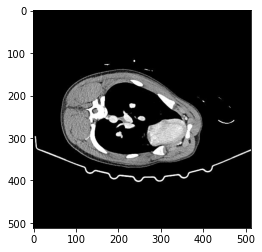

In [27]:
plt.imshow(imgs_train[420], cmap='gray')

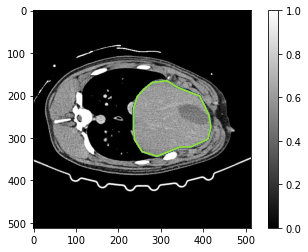

In [28]:
x=im
y= ma
plt.imshow(x[378,:,:], cmap="gray")
plt.colorbar()
plt.contour(y[378,:,:])

In [66]:
def window(
    data3d: np.ndarray,
    vmin: Optional[Number] = None,
    vmax: Optional[Number] = None,
    center: Optional[Number] = None,
    width: Optional[Number] = None,
    vmin_out: Optional[Number] = 0,
    vmax_out: Optional[Number] = 255,
    dtype=np.uint8,
):
    """
    Rescale input ndarray and trim the outlayers. Used for image intensity windowing.
    :param data3d: ndarray with numbers
    :param vmin: minimal input value. Skipped if center and width is given.
    :param vmax: maximal input value. Skipped if center and width is given.
    :param center: Window center
    :param width: Window width
    :param vmin_out: Output mapping minimal value
    :param vmax_out: Output mapping maximal value
    :param dtype: Output dtype
    :return:
    """
    if width and center:
        vmin = center - (width / 2.0)
        vmax = center + (width / 2.0)

    # logger.debug(f"vmin={vmin}, vmax={vmax}")
    k = float(vmax_out - vmin_out) / (vmax - vmin)
    q = vmax_out - k * vmax
    # logger.debug(f"k={k}, q={q}")
    data3d_out = data3d * k + q

    data3d_out[data3d_out > vmax_out] = vmax_out
    data3d_out[data3d_out < vmin_out] = vmin_out

    return data3d_out.astype(dtype)

In [67]:
import skimage.transform
def preprocess(imgs, is_mask=False, img_rows=256, img_cols=256):
    if not is_mask:
      imgs = window(imgs, center=40, width=400, vmin_out=0, vmax_out=255, dtype=np.uint8)

    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = skimage.transform.resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    if is_mask:
        imgs_p = (imgs_p > 0).astype('float32')
    else:
        imgs_p = imgs_p.astype('float32') / 255.
    return imgs_p

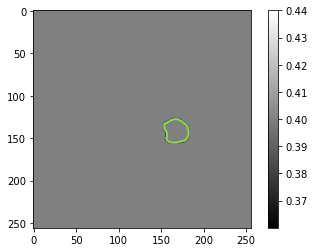

In [70]:
imgs_test = preprocess(imgs_train)
imgs_maskt = preprocess(masks_train, is_mask=True)

x=imgs_test
y=imgs_maskt

plt.imshow(x[220,:,:], cmap="gray")
plt.colorbar()
plt.contour(y[220,:,:,0])

In [25]:
len(y)

881